# Exploratory Data Analysis Notebook

Import the necessary packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data, and create a copy of it:

In [2]:
df = pd.read_csv('data/train_data.csv')
df_ = df.copy(deep = True)

In [3]:
print(f'This dataset has a total of {df.shape[0]} records and {df.shape[1]} columns.')

This dataset has a total of 81412 records and 34 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   admission_id                 81412 non-null  int64  
 1   patient_id                   81412 non-null  int64  
 2   race                         81412 non-null  object 
 3   gender                       81412 non-null  object 
 4   age                          79076 non-null  object 
 5   weight                       79852 non-null  object 
 6   admission_type_code          80250 non-null  float64
 7   discharge_disposition_code   80841 non-null  float64
 8   admission_source_code        81412 non-null  int64  
 9   time_in_hospital             81412 non-null  int64  
 10  payer_code                   81412 non-null  object 
 11  medical_specialty            81412 non-null  object 
 12  has_prosthesis               81412 non-null  bool   
 13  complete_vaccina

Let's check for missing values:

In [5]:
np.round((df_.isnull().sum()*100/len(df_)).sort_values(ascending = False), 2)

num_medications                3.29
age                            2.87
weight                         1.92
num_lab_procedures             1.83
diag_2                         1.66
admission_type_code            1.43
discharge_disposition_code     0.70
blood_transfusion              0.00
diag_3                         0.00
number_diagnoses               0.00
blood_type                     0.00
hemoglobin_level               0.00
admission_id                   0.00
max_glu_serum                  0.00
diag_1                         0.00
diuretics                      0.00
insulin                        0.00
change                         0.00
diabetesMed                    0.00
A1Cresult                      0.00
number_outpatient              0.00
number_inpatient               0.00
number_emergency               0.00
patient_id                     0.00
num_procedures                 0.00
complete_vaccination_status    0.00
has_prosthesis                 0.00
medical_specialty           

Fortunately, there are not a lot of missing values.

Let's check for duplicates:

In [6]:
df_.duplicated().sum()

0

There are no duplicate records.

## Column Analysis

### I. admission_id

Unique identifier of an encounter.

Therefore, we should have as many as there are records in the dataset:

In [7]:
df_['admission_id'].nunique()

81412

Checks out.

### II. patient_id

Unique identifier of a patient.

In [8]:
print(f'There are {df_["patient_id"].nunique()} distinct patients in the dataset.')

There are 60069 distinct patients in the dataset.


So, this means that some patients actually had to be readmitted several times. Let's see which had to be readmitted:

In [9]:
df_["patient_id"].value_counts()[df_["patient_id"].value_counts() > 1]

177571710    33
176455008    20
181219536    19
185418630    18
47286738     18
             ..
58982112      2
3071520       2
55655388      2
39916440      2
137677410     2
Name: patient_id, Length: 12647, dtype: int64

We see that the patient with the ID '177571710' has the most readmissions:

In [10]:
df_[df_["patient_id"] == 177571710]

,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
335,335,177571710,Caucasian,Female,[20-30),?,1.0,1.0,7,2,...,A+,13.4,False,None,None,No,Yes,Ch,Yes,Yes
2010,2010,177571710,Caucasian,Female,[20-30),?,NaN,1.0,7,2,...,A+,14.5,False,None,None,No,Yes,Ch,Yes,Yes
5303,5303,177571710,Caucasian,Female,[20-30),?,2.0,1.0,7,2,...,A+,12.9,True,None,None,No,Yes,Ch,Yes,Yes
9368,9368,177571710,WHITE,Female,[20-30),?,2.0,NaN,7,1,...,O+,13.1,False,NONE,None,No,Yes,Ch,Yes,Yes
11640,11640,177571710,Caucasian,Female,[20-30),?,2.0,1.0,7,2,...,O+,12.9,False,None,None,No,Yes,Ch,Yes,No
15762,15762,177571710,Caucasian,Female,[20-30),?,1.0,1.0,7,3,...,A+,15.7,False,None,None,No,Yes,Ch,Yes,No
17860,17860,177571710,Caucasian,Female,[20-30),?,3.0,1.0,7,5,...,A+,13.0,True,NONE,>8,No,Yes,Ch,Yes,No
18744,18744,177571710,Caucasian,Female,[20-30),?,2.0,1.0,7,5,...,O-,13.9,False,NONE,>8,No,Yes,Ch,Yes,Yes
20888,20888,177571710,White,Female,[20-30),?,3.0,7.0,4,3,...,A+,14.0,False,None,None,No,No,No,No,Yes
22133,22133,177571710,Caucasian,Female,[20-30),?,1.0,1.0,7,1,...,O-,14.2,False,None,None,No,Yes,Ch,Yes,No


Very weirdly, this patient's properties - that should not change over time, such as the blood type - change from record to record! We see that this person was marked as having the following blood types:

This seems like a data quality issue. The following columns shouldn't change with time:

* Race
* Gender
* Age (at least in a short time period)
* Blood type

So, let's see if we have a lot of these problems.

In [12]:
repeated_patients = df_["patient_id"].value_counts()[df_["patient_id"].value_counts() > 1].index.to_list()

static_cols = ['race',
               'gender',
               'age',
               'blood_type']

race_problems = []
gender_problems = []
age_problems = []
blood_type_problems = []

for col in static_cols:
    data_quality_errors = 0
    
    for patient in repeated_patients:
        value_counts = df_[df_["patient_id"] == patient][col].value_counts().values
        
        if len(value_counts) > 1:
            data_quality_errors += 1
            
            if col == 'race':
                race_problems.append(patient)
            elif col == 'gender':
                gender_problems.append(patient)
            elif col == 'age':
                age_problems.append(patient)
            else:
                blood_type_problems.append(patient)
    
    print(f'Column: {col}; issues detected: {data_quality_errors}')

Column: race; issues detected: 5958
Column: gender; issues detected: 2
Column: age; issues detected: 1122
Column: blood_type; issues detected: 10055


In [81]:
df_[df_['patient_id'] == blood_type_problems[0]]['blood_type'].value_counts()

A+     14
O+     11
O-      4
B+      2
AB+     1
A-      1
Name: blood_type, dtype: int64

### III. race

Patient race.

In [14]:
np.round(df_['race'].value_counts()*100/len(df_),2)

Caucasian           59.86
AfricanAmerican     11.31
White                7.39
African American     3.77
WHITE                3.74
European             3.06
?                    2.24
Black                1.90
Afro American        1.73
Hispanic             1.60
Other                1.45
EURO                 0.72
Asian                0.64
Latino               0.40
AFRICANAMERICAN      0.19
Name: race, dtype: float64

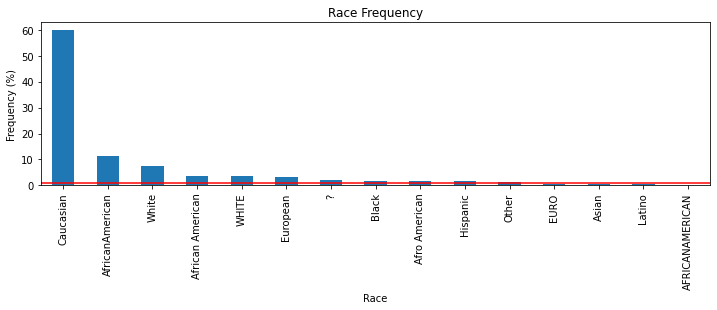

In [15]:
plt.figure(figsize = (12, 3))

(df_['race'].value_counts()*100/len(df_)).plot(kind = 'bar')

plt.axhline(1, c = 'r')

plt.ylabel('Frequency (%)')
plt.xlabel('Race')

plt.title('Race Frequency')

plt.show()

We can see already that this column has the following problems:
* Shouldn't 'Caucasian', 'White', 'WHITE' be the same?
* 'AfricanAmerican', 'African American', 'Afro American' and 'AFRICANAMERICAN' should be in the same category
* 'European' and 'EURO' should be in the same category
* What is a 'European' race supposed to be?
* The '?' race should, probably, belong to the 'Other' category

We also see that 'Caucasian' is the dominant category, and some other categories (from 'Other' downwards) have very small frequencies. This can be problematic for a ML model.

### IV. Gender

Patient gender.

In [16]:
np.round(df_['gender'].value_counts()*100/len(df_))

Female             54.0
Male               46.0
Unknown/Invalid     0.0
Name: gender, dtype: float64

We see that:
* We have more females than males
* We have a 'Unknown/Invalid' category, with an extremely small frequency. It might be helpful to remove these records.

In [17]:
df_[df_['gender'] == 'Unknown/Invalid']

,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
4544,4544,156239622,?,Unknown/Invalid,[70-80),?,1.0,22.0,7,8,...,O+,13.9,False,None,None,No,No,Ch,Yes,No
74058,74058,121049820,?,Unknown/Invalid,[60-70),?,1.0,1.0,7,1,...,A+,13.2,True,None,None,No,No,No,No,No


### V. age

Patient age grouped in 10-year intervals.

In [18]:
np.round(df_['age'].value_counts(dropna = False)*100/len(df_),2)

[70-80)     24.89
[60-70)     21.39
[50-60)     16.48
[80-90)     16.44
[40-50)      9.21
[30-40)      3.64
NaN          2.87
[90-100)     2.67
[20-30)      1.59
[10-20)      0.66
[0-10)       0.17
Name: age, dtype: float64

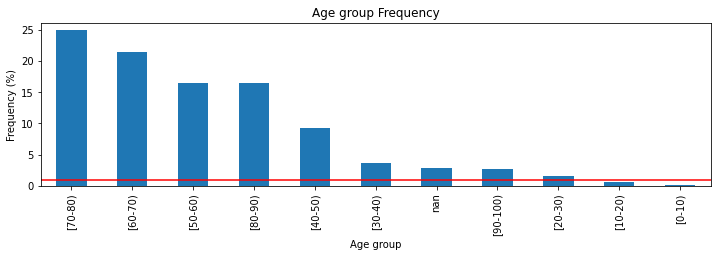

In [19]:
plt.figure(figsize = (12, 3))

(df_['age'].value_counts(dropna = False)*100/len(df_)).plot(kind = 'bar')

plt.axhline(1, c = 'r')

plt.ylabel('Frequency (%)')
plt.xlabel('Age group')

plt.title('Age group Frequency')

plt.show()

We see that older age groups are the ones that have a higher presence. This makes sense.

There some missing values in this data; **this should be clarified**.

Since the 0-10 and 10-20 age groups have a very low frequency, it might be helpful to group these in the same category (0-20, for example).

### VI. weight

Patient weight (lb).

In [20]:
np.round(df_['weight'].value_counts(dropna = False)*100/len(df_),2)

?            95.01
NaN           1.92
[75-100)      1.27
[50-75)       0.88
[100-125)     0.59
[125-150)     0.14
[25-50)       0.09
[0-25)        0.05
[150-175)     0.03
[175-200)     0.01
>200          0.00
Name: weight, dtype: float64

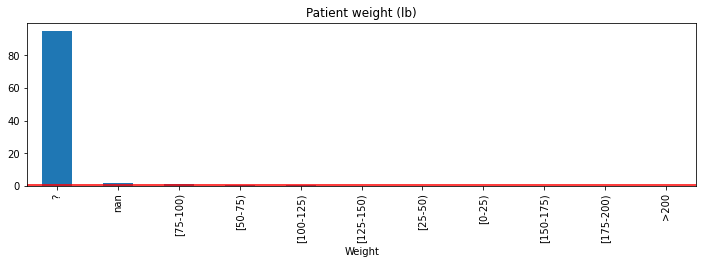

In [21]:
plt.figure(figsize = (12, 3))

(df_['weight'].value_counts(dropna = False)*100/len(df_)).plot(kind = 'bar')

plt.axhline(1, c = 'r')

plt.title('Patient weight (lb)')
plt.xlabel('Weight')

plt.show()

Strangely, very little is known about the patients weight; since we are talking about a hospital, shouldn't weight be one of the best known characteristics? This column will not be useful due to the lack of missing values.

### VII. admission_type_code

Admission type identifier.

In [22]:
np.round(df_['admission_type_code'].value_counts(dropna = False)*100/len(df_),2).sort_index()

1.0    52.28
2.0    17.90
3.0    18.28
4.0     0.01
5.0     4.63
6.0     5.14
7.0     0.02
8.0     0.31
NaN     1.43
Name: admission_type_code, dtype: float64

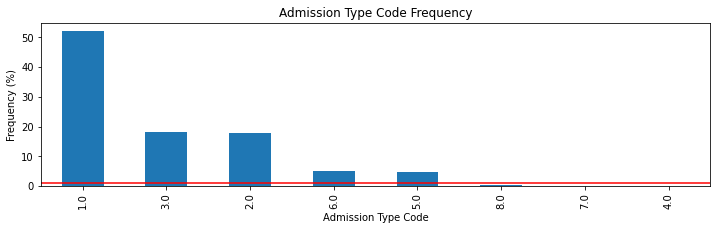

In [23]:
plt.figure(figsize = (12, 3))

(df_['admission_type_code'].value_counts()*100/len(df_)).plot(kind = 'bar')

plt.axhline(1, c = 'r')

plt.ylabel('Frequency (%)')
plt.xlabel('Admission Type Code')

plt.title('Admission Type Code Frequency')

plt.show()

These numbers correspond to the following categories:

1. Emergency
2. Urgent
3. Elective
4. Newborn
5. Not available
6. NULL
7. Trauma Center
8. Not mapped

So, I have the following questions:
* What is the difference between 'Emergency' and 'Urgent'? Is 'Emergency' > 'Urgent'?
* What does 'Elective' mean? Does this mean that it was chosen by the patient? Does it mean it is not considered as urgent?
* What is the 'Newborn' category? Does this mean the person entering the ER was a newborn?
* What does the 'Not available' and 'Trauma Center' categories mean?
* What is the 'Not Mapped' category?

Also,
* 'NULL' and 'Not available' should belong to the same category, I would say
* We need to deal with the missing values.

Useful link: https://resdac.org/cms-data/variables/claim-inpatient-admission-type-code-ffs

### VIII. discharge_disposition_code

discharge_disposition_code.

In [24]:
np.round(df_['discharge_disposition_code'].value_counts(dropna = False)*100/len(df_),2)

1.0     58.78
3.0     13.63
6.0     12.58
18.0     3.58
2.0      2.08
22.0     1.94
11.0     1.61
5.0      1.15
25.0     0.97
4.0      0.80
NaN      0.70
7.0      0.62
23.0     0.40
13.0     0.39
14.0     0.36
28.0     0.13
8.0      0.10
15.0     0.06
24.0     0.05
9.0      0.02
17.0     0.01
16.0     0.01
19.0     0.01
10.0     0.01
27.0     0.00
12.0     0.00
Name: discharge_disposition_code, dtype: float64

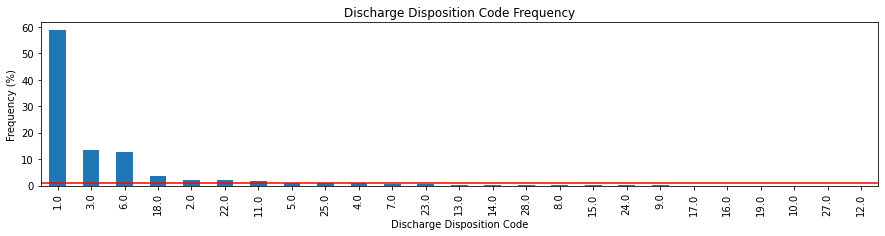

In [25]:
plt.figure(figsize = (15, 3))

(df_['discharge_disposition_code'].value_counts()*100/len(df_)).plot(kind = 'bar')

plt.axhline(1, c = 'r')

plt.ylabel('Frequency (%)')
plt.xlabel('Discharge Disposition Code')

plt.title('Discharge Disposition Code Frequency')

plt.show()

These numbers correspond to the following categories:

1. Discharged to home
2. Discharged/transferred to another short term hospital
3. Discharged/transferred to SNF (Skilled Nursing Facility)
4. Discharged/transferred to ICF (Intermediate Care Facility)
5. Discharged/transferred to another type of inpatient care institution
6. Discharged/transferred to home with home health service
7. Left AMA (Agaisnt Medical Advice)
8. Discharged/transferred to home under care of Home IV provider
9. Admitted as an inpatient to this hospital
10. Neonate discharged to another hospital for neonatal aftercare
11. Expired
12. Still patient or expected to return for outpatient services
13. Hospice / home
14. Hospice / medical facility
15. Discharged/transferred within this institution to Medicare approved swing bed
16. Discharged/transferred/referred another institution for outpatient services
17. Discharged/transferred/referred to this institution for outpatient services
18. NULL
19. ""Expired at home. Medicaid only:  hospice.""
20. ""Expired in a medical facility. Medicaid only:  hospice.""
21. ""Expired:  place unknown. Medicaid only:  hospice.""
22. Discharged/transferred to another rehab fac including rehab units of a hospital .
23. Discharged/transferred to a long term care hospital.
24. Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25. Not Mapped
26. Unknown/Invalid
30. Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
27. Discharged/transferred to a federal health care facility.
28. Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
29. Discharged/transferred to a Critical Access Hospital (CAH).

Many of these categories are quite confusing, but most of them are very rare.

Useful link: https://med.noridianmedicare.com/web/jfa/topics/claim-submission/patient-discharge-status-codes

### IX. admission_source_code

Admission source identifier.

In [26]:
np.round(df_['admission_source_code'].value_counts(dropna = False)*100/len(df_),2)

7     56.43
1     29.09
17     6.65
4      3.17
6      2.23
2      1.08
5      0.84
3      0.18
20     0.16
9      0.12
8      0.02
22     0.01
10     0.01
11     0.00
14     0.00
25     0.00
13     0.00
Name: admission_source_code, dtype: float64

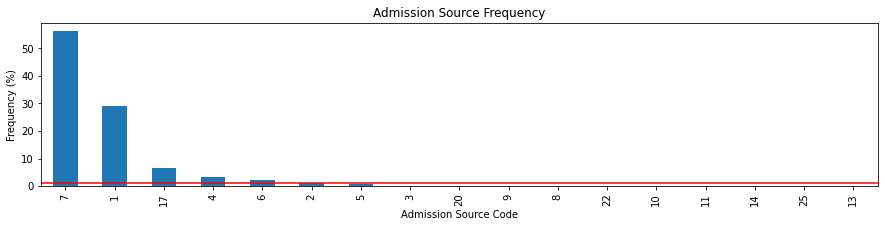

In [27]:
plt.figure(figsize = (15, 3))

(df_['admission_source_code'].value_counts()*100/len(df_)).plot(kind = 'bar')

plt.axhline(1, c = 'r')

plt.ylabel('Frequency (%)')
plt.xlabel('Admission Source Code')

plt.title('Admission Source Frequency')

plt.show()

These numbers correspond to the following categories:

1. Physician Referral
2. Clinic Referral
3. HMO Referral
4. Transfer from a hospital
5. Transfer from a Skilled Nursing Facility (SNF)
6. Transfer from another health care facility
7. Emergency Room
8. Court/Law Enforcement
9. Not Available
10. Transfer from critial access hospital
11. Normal Delivery
12. Premature Delivery
13. Sick Baby
14. Extramural Birth
15. Not Available
17. NULL
18. Transfer From Another Home Health Agency
19. Readmission to Same Home Health Agency
20. Not Mapped
21. Unknown/Invalid
22. Transfer from hospital inpt/same fac reslt in a sep claim
23. Born inside this hospital
24. Born outside this hospital
25. Transfer from Ambulatory Surgery Center
26. Transfer from Hospice

Useful link: https://www.health.ny.gov/statistics/sparcs/sysdoc/elements_837/source_of_admission.htm

### X. time_in_hospital

Number of days between admission and discharge.

In [28]:
print(f'Minimum number of days: {df_["time_in_hospital"].min()}')
print(f'Maximum number of days: {df_["time_in_hospital"].max()}')
print(f'Missing values: {df["time_in_hospital"].isnull().sum()}')
print('\n')
print(f'Mean: {df_["time_in_hospital"].mean()}')
print(f'Median: {df_["time_in_hospital"].median()}')
print(f'Standard Deviation: {df["time_in_hospital"].std()}')

Minimum number of days: 1
Maximum number of days: 14
Missing values: 0


Mean: 4.395924433744411
Median: 4.0
Standard Deviation: 2.975844099271551


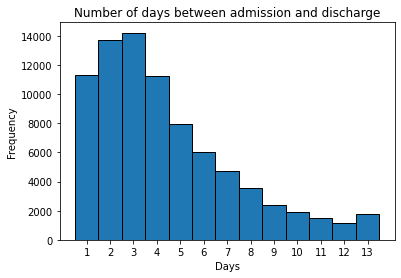

In [29]:
df['time_in_hospital'].plot(kind = 'hist', bins = 13, align = 'left', edgecolor = 'k')

plt.xticks(np.arange(1, 14))

plt.title('Number of days between admission and discharge')
plt.xlabel('Days')

plt.show()

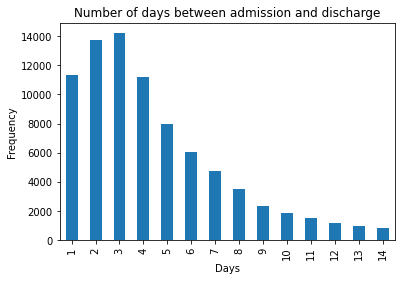

In [30]:
plt.figure(figsize = (6, 4))

(df_['time_in_hospital'].value_counts()).sort_index().plot(kind = 'bar')

plt.title('Number of days between admission and discharge')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.show()

### XI. payer_code

Payer identifier.

In [31]:
np.round(df_['payer_code'].value_counts(dropna = False)*100/len(df_),2)

?     39.65
MC    31.88
HM     6.11
SP     4.92
BC     4.57
MD     3.47
CP     2.52
UN     2.36
CM     1.91
OG     0.98
PO     0.58
DM     0.54
CH     0.15
WC     0.13
OT     0.10
MP     0.08
SI     0.06
FR     0.00
Name: payer_code, dtype: float64

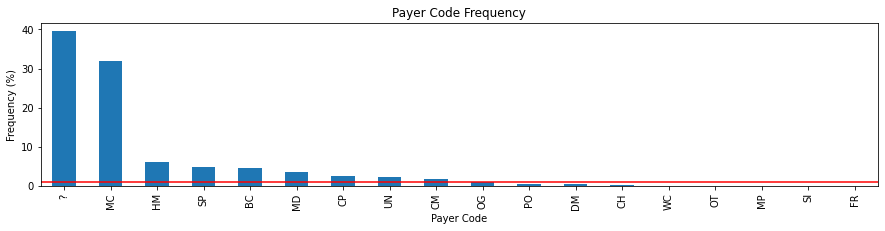

In [32]:
plt.figure(figsize = (15, 3))

(df_['payer_code'].value_counts()*100/len(df_)).plot(kind = 'bar')

plt.axhline(1, c = 'r')

plt.ylabel('Frequency (%)')
plt.xlabel('Payer Code')

plt.title('Payer Code Frequency')

plt.show()

### XII. medical_specialty

Physician speciality.

In [33]:
np.round(df_['medical_specialty'].value_counts(dropna = False)*100/len(df_),2)

?                         49.16
InternalMedicine          14.39
Emergency/Trauma           7.40
Family/GeneralPractice     7.29
Cardiology                 5.25
                          ...  
Psychiatry-Addictive       0.00
Resident                   0.00
Proctology                 0.00
Neurophysiology            0.00
Dermatology                0.00
Name: medical_specialty, Length: 71, dtype: float64

In [34]:
print(f'There are {df_["medical_specialty"].nunique()} distinct specialities. These are:')

for specialty in df_["medical_specialty"].unique():
    print(specialty)

There are 71 distinct specialities. These are:
?
Emergency/Trauma
InternalMedicine
Family/GeneralPractice
Radiologist
Orthopedics
Cardiology
PhysicalMedicineandRehabilitation
Orthopedics-Reconstructive
Psychiatry
Surgery-Thoracic
Surgery-Vascular
Hematology/Oncology
Osteopath
ObstetricsandGynecology
Pediatrics
Nephrology
Otolaryngology
Urology
Surgery-General
Anesthesiology-Pediatric
Surgery-Cardiovascular/Thoracic
Gastroenterology
Pulmonology
Oncology
Podiatry
Surgery-Neuro
Pediatrics-Endocrinology
Neurology
Obstetrics
Endocrinology
PhysicianNotFound
Hospitalist
Pathology
Surgery-Pediatric
Radiology
Surgery-Plastic
Pediatrics-CriticalCare
Psychology
Psychiatry-Child/Adolescent
Ophthalmology
Surgery-Cardiovascular
Pediatrics-Pulmonology
DCPTEAM
Obsterics&Gynecology-GynecologicOnco
Surgeon
Pediatrics-EmergencyMedicine
Hematology
AllergyandImmunology
SurgicalSpecialty
OutreachServices
Rheumatology
Dentistry
Gynecology
InfectiousDiseases
Anesthesiology
Surgery-Colon&Rectal
Pediatrics-Neur

We have the following issues with this column:

* First of all, the '?' category, which represents the majority; so, we don't know the specialty of most doctors?
* 'PhysicianNotFound' category; how is this possible? What does this mean? We have 10 records with this specialty:

In [35]:
df_[df_['medical_specialty'] == 'PhysicianNotFound']

,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
889,889,401796,AfricanAmerican,Female,[30-40),?,1.0,6.0,7,4,...,O+,13.5,True,None,None,No,No,No,No,No
2276,2276,212056794,Caucasian,Male,[60-70),?,1.0,6.0,7,4,...,A+,14.1,False,None,None,No,Yes,Ch,Yes,No
12347,12347,177782130,Caucasian,Male,[40-50),?,1.0,1.0,7,2,...,A-,15.3,False,NONE,None,No,No,No,No,No
13373,13373,200273454,Asian,Female,[80-90),?,2.0,6.0,1,1,...,O+,13.6,False,None,None,No,No,No,Yes,No
13491,13491,138058488,Caucasian,Male,[50-60),?,1.0,1.0,17,3,...,B-,14.6,False,None,>7,No,Yes,Ch,Yes,No
54679,54679,109820394,Asian,Male,[70-80),?,1.0,1.0,7,4,...,A+,16.0,False,None,None,No,No,No,No,No
56365,56365,167391558,Caucasian,Female,[60-70),?,1.0,11.0,7,2,...,A+,11.9,False,None,None,No,No,No,No,No
68184,68184,82018998,Caucasian,Male,[80-90),?,3.0,6.0,1,4,...,O+,14.8,True,NONE,None,No,Yes,Ch,Yes,Yes
71907,71907,134809704,Caucasian,Female,[80-90),?,3.0,3.0,17,2,...,O+,13.9,False,None,None,No,No,No,Yes,Yes
79721,79721,43006572,Caucasian,Female,[60-70),?,2.0,6.0,4,10,...,O+,14.4,False,None,None,No,No,Ch,Yes,No


### XIII. has_prosthesis

Indicates if patient has any prothesis.

In [36]:
np.round(df_['has_prosthesis'].value_counts(dropna = False)*100/len(df_),2)

False    98.94
True      1.06
Name: has_prosthesis, dtype: float64

This column has a high category imbalance! There's a probability that it won't be useful to us.

### XIV. complete_vaccination_status

The patient vaccination status.

In [37]:
np.round(df_['complete_vaccination_status'].value_counts(dropna = False)*100/len(df_),2)

Complete      82.44
Incomplete    17.17
None           0.39
Name: complete_vaccination_status, dtype: float64

Might be useful to group the 'None' and 'Incomplete' category in the same category.

### XV. num_lab_procedures

Number of lab tests performed during the encounter.

In [38]:
print(f'Minimum number of lab tests: {df_["num_lab_procedures"].min()}')
print(f'Maximum number of lab tests: {df_["num_lab_procedures"].max()}')
print(f'Missing values: {df["num_lab_procedures"].isnull().sum()}')

print('\n')
print(f'Mean: {df_["num_lab_procedures"].mean()}')
print(f'Median: {df_["num_lab_procedures"].median()}')
print(f'Standard Deviation: {df["num_lab_procedures"].std()}')

Minimum number of lab tests: 1.0
Maximum number of lab tests: 132.0
Missing values: 1493


Mean: 43.07119708705064
Median: 44.0
Standard Deviation: 19.630404930231354


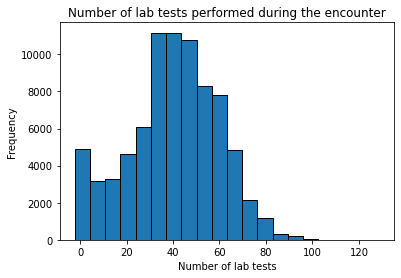

In [39]:
df['num_lab_procedures'].plot(kind = 'hist', align = 'left', edgecolor = 'k', bins = 20)

plt.title('Number of lab tests performed during the encounter')
plt.xlabel('Number of lab tests')
plt.show()

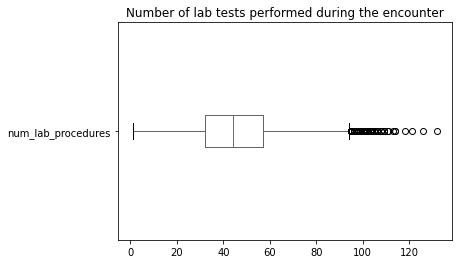

In [40]:
df['num_lab_procedures'].plot(kind = 'box', vert = False)

plt.title('Number of lab tests performed during the encounter')
plt.show()

We have A LOT of outliers here. Let's see how many:

In [41]:
# Calculate the Interquartile range
IQR = df['num_lab_procedures'].quantile(0.75) - df['num_lab_procedures'].quantile(0.25)

# Find the lower and upper boundaries
lower = df['num_lab_procedures'].quantile(0.25) - (IQR * 1.5)
upper = df['num_lab_procedures'].quantile(0.75) + (IQR * 1.5)

# Count the number of outliers
((df['num_lab_procedures'] > upper) | (df['num_lab_procedures'] < lower)).sum()

163

### XVI. num_procedures

Number of procedures (other than lab tests) performed during the encounter.

In [42]:
print(f'Minimum number of procedures: {df_["num_procedures"].min()}')
print(f'Maximum number of procedures: {df_["num_procedures"].max()}')
print(f'Missing values: {df["num_procedures"].isnull().sum()}')

print('\n')
print(f'Mean: {df_["num_procedures"].mean()}')
print(f'Median: {df_["num_procedures"].median()}')
print(f'Standard Deviation: {df["num_procedures"].std()}')

Minimum number of procedures: 0
Maximum number of procedures: 6
Missing values: 0


Mean: 1.3417677983589642
Median: 1.0
Standard Deviation: 1.7084647813702645


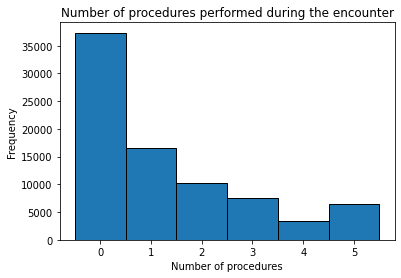

In [43]:
df['num_procedures'].plot(kind = 'hist', align = 'left', edgecolor = 'k', bins = 6)

plt.title('Number of procedures performed during the encounter')
plt.xlabel('Number of procedures')
plt.show()

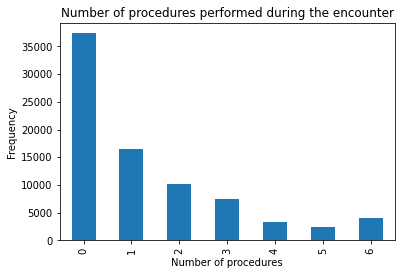

In [44]:
plt.figure(figsize = (6, 4))

(df_['num_procedures'].value_counts()).sort_index().plot(kind = 'bar')

plt.title('Number of procedures performed during the encounter')
plt.xlabel('Number of procedures')
plt.ylabel('Frequency')

plt.show()

### XVII. num_medications

Number of distinct generic names administered during the encounter.

In [45]:
print(f'Minimum number of medications: {df_["num_medications"].min()}')
print(f'Maximum number of medications: {df_["num_medications"].max()}')
print(f'Missing values: {df["num_medications"].isnull().sum()}')

print('\n')
print(f'Mean: {df_["num_medications"].mean()}')
print(f'Median: {df_["num_medications"].median()}')
print(f'Standard Deviation: {df["num_medications"].std()}')

Minimum number of medications: 1.0
Maximum number of medications: 81.0
Missing values: 2678


Mean: 16.024424009957578
Median: 15.0
Standard Deviation: 8.107234782707396


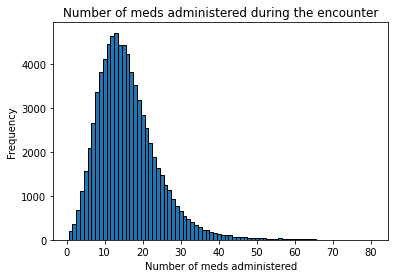

In [46]:
df['num_medications'].plot(kind = 'hist', align = 'left', edgecolor = 'k', bins = 80)

plt.title('Number of meds administered during the encounter')
plt.xlabel('Number of meds administered')
plt.show()

We see that this variable is right-skewed, and we'll have a lot of outliers:

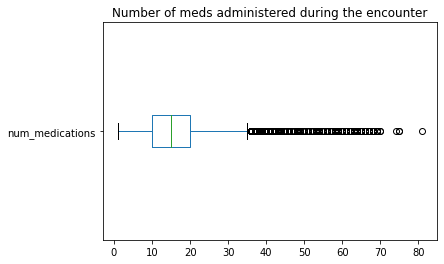

In [47]:
df['num_medications'].plot(kind = 'box', vert = False)

plt.title('Number of meds administered during the encounter')
plt.show()

In [48]:
# Calculate the Interquartile range
IQR = df['num_medications'].quantile(0.75) - df['num_medications'].quantile(0.25)

# Find the lower and upper boundaries
lower = df['num_medications'].quantile(0.25) - (IQR * 1.5)
upper = df['num_medications'].quantile(0.75) + (IQR * 1.5)

# Count the number of outliers
((df['num_medications'] > upper) | (df['num_medications'] < lower)).sum()

1968

These are the outliers present.

### XVIII. number_outpatient

Number of outpatient visits of the patient in the year preceding the encounter.

In [49]:
print(f'Minimum number of outpatient visits: {df_["number_outpatient"].min()}')
print(f'Maximum number of outpatient visits: {df_["number_outpatient"].max()}')
print(f'Missing values: {df["num_medications"].isnull().sum()}')

print('\n')
print(f'Mean: {df_["number_outpatient"].mean()}')
print(f'Median: {df_["number_outpatient"].median()}')
print(f'Standard Deviation: {df["number_outpatient"].std()}')

Minimum number of outpatient visits: 0
Maximum number of outpatient visits: 42
Missing values: 2678


Mean: 0.3709526851078465
Median: 0.0
Standard Deviation: 1.2785378610596128


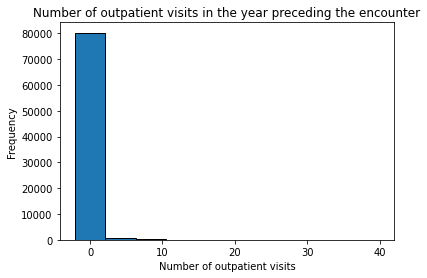

In [50]:
df['number_outpatient'].plot(kind = 'hist', align = 'left', edgecolor = 'k')

plt.title('Number of outpatient visits in the year preceding the encounter')
plt.xlabel('Number of outpatient visits')
plt.show()

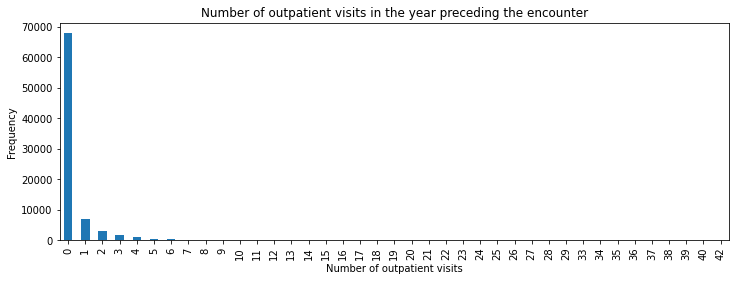

In [51]:
plt.figure(figsize = (12, 4))

(df_['number_outpatient'].value_counts()).sort_index().plot(kind = 'bar')

plt.title('Number of outpatient visits in the year preceding the encounter')
plt.xlabel('Number of outpatient visits')
plt.ylabel('Frequency')

plt.show()

Useful link: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3117

### XIX. number_emergency

Number of emergency visits of the patient in the year preceding the encounter.

In [52]:
print(f'Minimum number of emergency visits: {df_["number_emergency"].min()}')
print(f'Maximum number of emergency visits: {df_["number_emergency"].max()}')
print(f'Missing values: {df["number_emergency"].isnull().sum()}')

print('\n')
print(f'Mean: {df_["number_emergency"].mean()}')
print(f'Median: {df_["number_emergency"].median()}')
print(f'Standard Deviation: {df["number_emergency"].std()}')

Minimum number of emergency visits: 0
Maximum number of emergency visits: 64
Missing values: 0


Mean: 0.19758757922664963
Median: 0.0
Standard Deviation: 0.8812896988719185


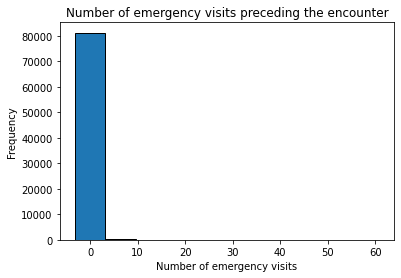

In [53]:
df['number_emergency'].plot(kind = 'hist', align = 'left', edgecolor = 'k')

plt.title('Number of emergency visits preceding the encounter')
plt.xlabel('Number of emergency visits')
plt.show()

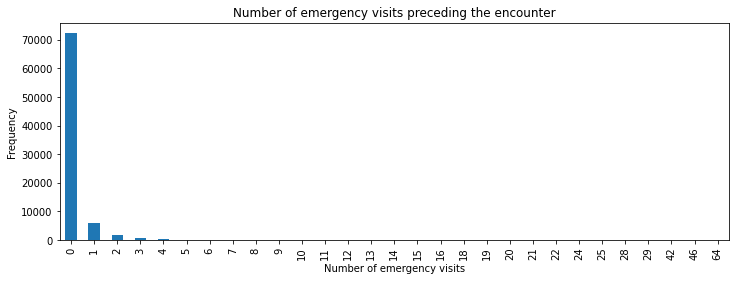

In [54]:
plt.figure(figsize = (12, 4))

(df_['number_emergency'].value_counts()).sort_index().plot(kind = 'bar')

plt.title('Number of emergency visits preceding the encounter')
plt.xlabel('Number of emergency visits')
plt.ylabel('Frequency')

plt.show()

### XX. number_inpatient

Number of inpatient visits of the patient in the year preceding the encounter (it was necessary to stay overnight).

Useful link: https://www.sgu.edu/blog/medical/inpatient-versus-outpatient/

In [55]:
print(f'Minimum number of inpatient visits: {df_["number_inpatient"].min()}')
print(f'Maximum number of inpatient visits: {df_["number_inpatient"].max()}')
print(f'Missing values: {df["number_inpatient"].isnull().sum()}')

print('\n')
print(f'Mean: {df_["number_inpatient"].mean()}')
print(f'Median: {df_["number_inpatient"].median()}')
print(f'Standard Deviation: {df["number_inpatient"].std()}')

Minimum number of inpatient visits: 0
Maximum number of inpatient visits: 21
Missing values: 0


Mean: 0.6377929543556232
Median: 0.0
Standard Deviation: 1.2654724138197988


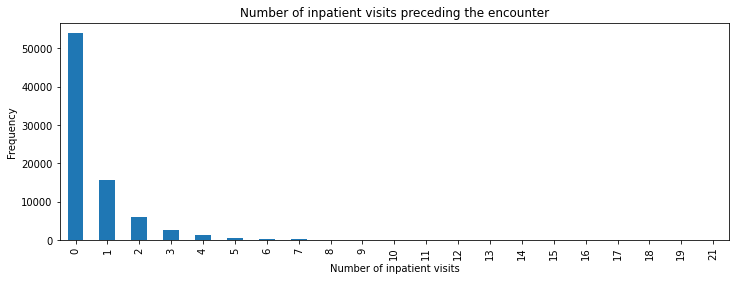

In [56]:
plt.figure(figsize = (12, 4))

(df_['number_inpatient'].value_counts()).sort_index().plot(kind = 'bar')

plt.title('Number of inpatient visits preceding the encounter')
plt.xlabel('Number of inpatient visits')
plt.ylabel('Frequency')

plt.show()

### XXI. diag_1

The primary diagnosis (coded as first three digits of ICD9, Internacional Classification for diseases).

In [57]:
np.round(df_['diag_1'].value_counts(dropna = False)*100/len(df_),2)

428    6.67
414    6.47
786    3.97
410    3.58
486    3.41
       ... 
84     0.00
703    0.00
V60    0.00
500    0.00
23     0.00
Name: diag_1, Length: 701, dtype: float64

In [58]:
print(f'There are {df_["diag_1"].nunique()} distinct codes.')

There are 701 distinct codes.


### XXII. diag_2

Secondary diagnosis (coded as first three digits of ICD9).

In [59]:
np.round(df_['diag_2'].value_counts(dropna = False)*100/len(df_),2)

276       6.51
428       6.43
250       5.87
427       4.85
401       3.57
          ... 
250.31    0.00
665       0.00
88        0.00
232       0.00
734       0.00
Name: diag_2, Length: 726, dtype: float64

In [60]:
print(f'There are {df_["diag_2"].nunique()} distinct codes.')

There are 725 distinct codes.


What is the difference between this column and diag_1?

### XXIII. diag_3

Additional secondary diagnosis (coded as first three digits of ICD9).

In [61]:
np.round(df_['diag_3'].value_counts(dropna = False)*100/len(df_), 2)

250    11.26
401     8.11
276     5.05
428     4.59
427     3.88
       ...  
14      0.00
268     0.00
215     0.00
27      0.00
744     0.00
Name: diag_3, Length: 761, dtype: float64

In [62]:
print(f'There are {df_["diag_3"].nunique()} distinct codes.')

There are 761 distinct codes.


In [63]:
df[['diag_1', 'diag_2', 'diag_3']].head()

,diag_1,diag_2,diag_3
0,721,250.6,357
1,276,507,150
2,414,490,250
3,577,585,250
4,531,532,562


So, these three columns all have different values... I will need to understand better what they mean, and their differences.

### XXIV. number_diagnoses

Number of diagnoses entered to the system.

In [64]:
print(f'Minimum number of diagnoses introduced into the system: {df_["number_diagnoses"].min()}')
print(f'Maximum number of diagnoses introduced into the system: {df_["number_diagnoses"].max()}')
print(f'Missing values: {df["number_diagnoses"].isnull().sum()}')

print('\n')
print(f'Mean: {df_["number_diagnoses"].mean()}')
print(f'Median: {df_["number_diagnoses"].median()}')
print(f'Standard Deviation: {df["number_diagnoses"].std()}')

Minimum number of diagnoses introduced into the system: 1
Maximum number of diagnoses introduced into the system: 16
Missing values: 0


Mean: 7.421964820910922
Median: 8.0
Standard Deviation: 1.9314804627331916


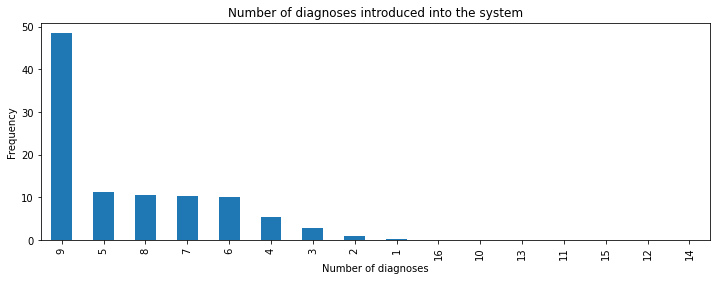

In [65]:
plt.figure(figsize = (12, 4))

(df_['number_diagnoses'].value_counts()*100/len(df_)).plot(kind = 'bar')

plt.title('Number of diagnoses introduced into the system')
plt.xlabel('Number of diagnoses')
plt.ylabel('Frequency')

plt.show()

### XV. blood_type

Patient blood type

In [66]:
np.round(df_['blood_type'].value_counts(dropna = False)*100/len(df_), 2)

O+     39.37
A+     30.39
B+     11.32
O-      6.99
A-      5.93
AB+     3.22
B-      1.82
AB-     0.96
Name: blood_type, dtype: float64

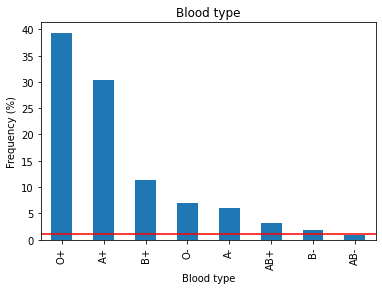

In [67]:
plt.figure(figsize = (6, 4))

(df_['blood_type'].value_counts()*100/len(df)).plot(kind = 'bar')

plt.axhline(1, color = 'r')

plt.title('Blood type')
plt.xlabel('Blood type')
plt.ylabel('Frequency (%)')

plt.show()

### XXVI. hemoglobin_level

Encounter initial patient hemoglobin level (g/dl).

For reference:

* For men, the reference values are located in the range 13.5-17.5 (g/dl)
* For women, the reference values are located in the range 12.0 to 15.5 (g/dl)

So, a possibility would be to create a column that tells if the hemoglobin level is in the healthy range for male and females separately (and possibly include the age aswell).

In [68]:
print(f'Minimum Initial patient hemoglobin level: {df_["hemoglobin_level"].min()}')
print(f'Maximum Initial patient hemoglobin level: {df_["hemoglobin_level"].max()}')
print(f'Missing values: {df["hemoglobin_level"].isnull().sum()}')

print('\n')
print(f'Mean: {df_["hemoglobin_level"].mean()}')
print(f'Median: {df_["hemoglobin_level"].median()}')
print(f'Standard Deviation: {df["hemoglobin_level"].std()}')

Minimum Initial patient hemoglobin level: 10.5
Maximum Initial patient hemoglobin level: 18.6
Missing values: 0


Mean: 14.192327912347071
Median: 14.1
Standard Deviation: 1.0599999328706193


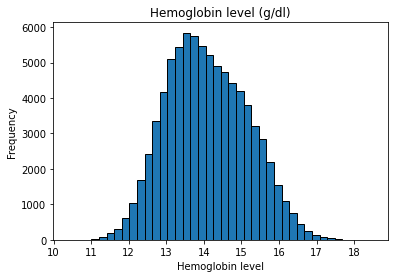

In [69]:
df['hemoglobin_level'].plot(kind = 'hist', align = 'left', edgecolor = 'k', bins = 40)

plt.title('Hemoglobin level (g/dl)')
plt.xlabel('Hemoglobin level')
plt.show()

It seems to follow a normal distribution, with a mean value of 14.1

### XXVII. blood_transfusion

Indicates if pacient required blood transfusion during encounter.

In [70]:
np.round(df_['blood_transfusion'].value_counts(dropna = False)*100/len(df_), 2)

False    88.07
True     11.93
Name: blood_transfusion, dtype: float64

Most people did not require blood transfusion.

### XXVIII. max_glu_serum

Indicates the range of the glucose serum result or if the test was not taken. 

In [71]:
np.round(df_['max_glu_serum'].value_counts(dropna = False)*100/len(df_), 2)

None    66.40
NONE    28.37
Norm     1.48
>200     1.45
>300     1.26
NORM     1.03
Name: max_glu_serum, dtype: float64

So, we see some data quality issues with this column:

* 'NONE' and 'None' should belong to the same category; however, since they are written differently, they are not
* The same for 'NORM' and 'Norm'.

### XXIX. A1Cresult

Indicates the range of the A1c test result or if the test was not taken.

For reference, an AC1 test reflects the average blood sugar level for the past two to three months.

In [72]:
np.round(df_['A1Cresult'].value_counts(dropna = False)*100/len(df_), 2)

None    83.29
>8       8.04
Norm     4.92
>7       3.75
Name: A1Cresult, dtype: float64

There doesn't seem to be any data quality problems with this column.

### XXX. diuretics

Indicate whether diuretics were prescribed.

In [73]:
np.round(df_['diuretics'].value_counts(dropna = False)*100/len(df_), 2)

No     98.13
Yes     1.87
Name: diuretics, dtype: float64

In the majority of the cases, diuretics were not perscribed.

### XXXI. insulin

Indicate whether insulin was prescribed.

In [74]:
np.round(df_['insulin'].value_counts(dropna = False)*100/len(df_), 2)

Yes    54.49
No     45.51
Name: insulin, dtype: float64

This is relatively well balanced.

### XXXII. change

Indicates if there was a change in diabetic medications (either dosage or generic name). 

In [75]:
np.round(df_['change'].value_counts(dropna = False)*100/len(df_), 2)

No    53.77
Ch    46.23
Name: change, dtype: float64

This is relatively well balanced.

### XXXIII. diabetesMed

Indicates if there was any diabetic medication prescribed.

In [76]:
np.round(df_['diabetesMed'].value_counts(dropna = False)*100/len(df_), 2)

Yes    77.04
No     22.96
Name: diabetesMed, dtype: float64

### XXXIV. readmitted

Patient readmitted within 30 days of discharge.

In [77]:
np.round(df_['readmitted'].value_counts(dropna = False)*100/len(df_), 2)

No     88.86
Yes    11.14
Name: readmitted, dtype: float64

This is the class we want to predict. We can see our problem is highly imbalanced. This will need to be addressed.

## Correlation analysis

In [78]:
df['Target'] = df['readmitted'].apply(lambda x: 1 if x == 'Yes' else 0)

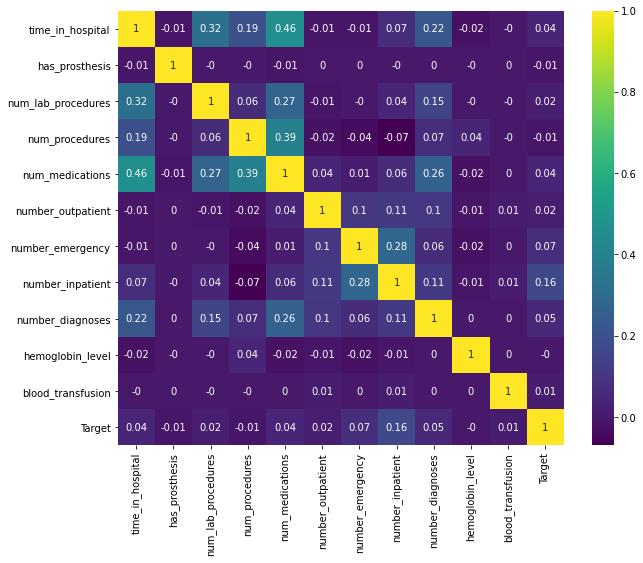

In [79]:
cols_to_drop = ['admission_id', 
                'patient_id', 
                'admission_type_code', 
                'discharge_disposition_code',
                'admission_source_code']

corr = np.round(df.drop(columns = cols_to_drop).corr(), 2)

plt.figure(figsize = (10,8))

sns.heatmap(corr, cmap = 'viridis', annot = True)

plt.show()

There doesn't seem to be a high correlation between the numerical variables; the highest is 0.46, between 'time_in_hospital' and 'num_medications'. In turn, none of them seem to strongly correlate with the target.

## Pairplot analysis

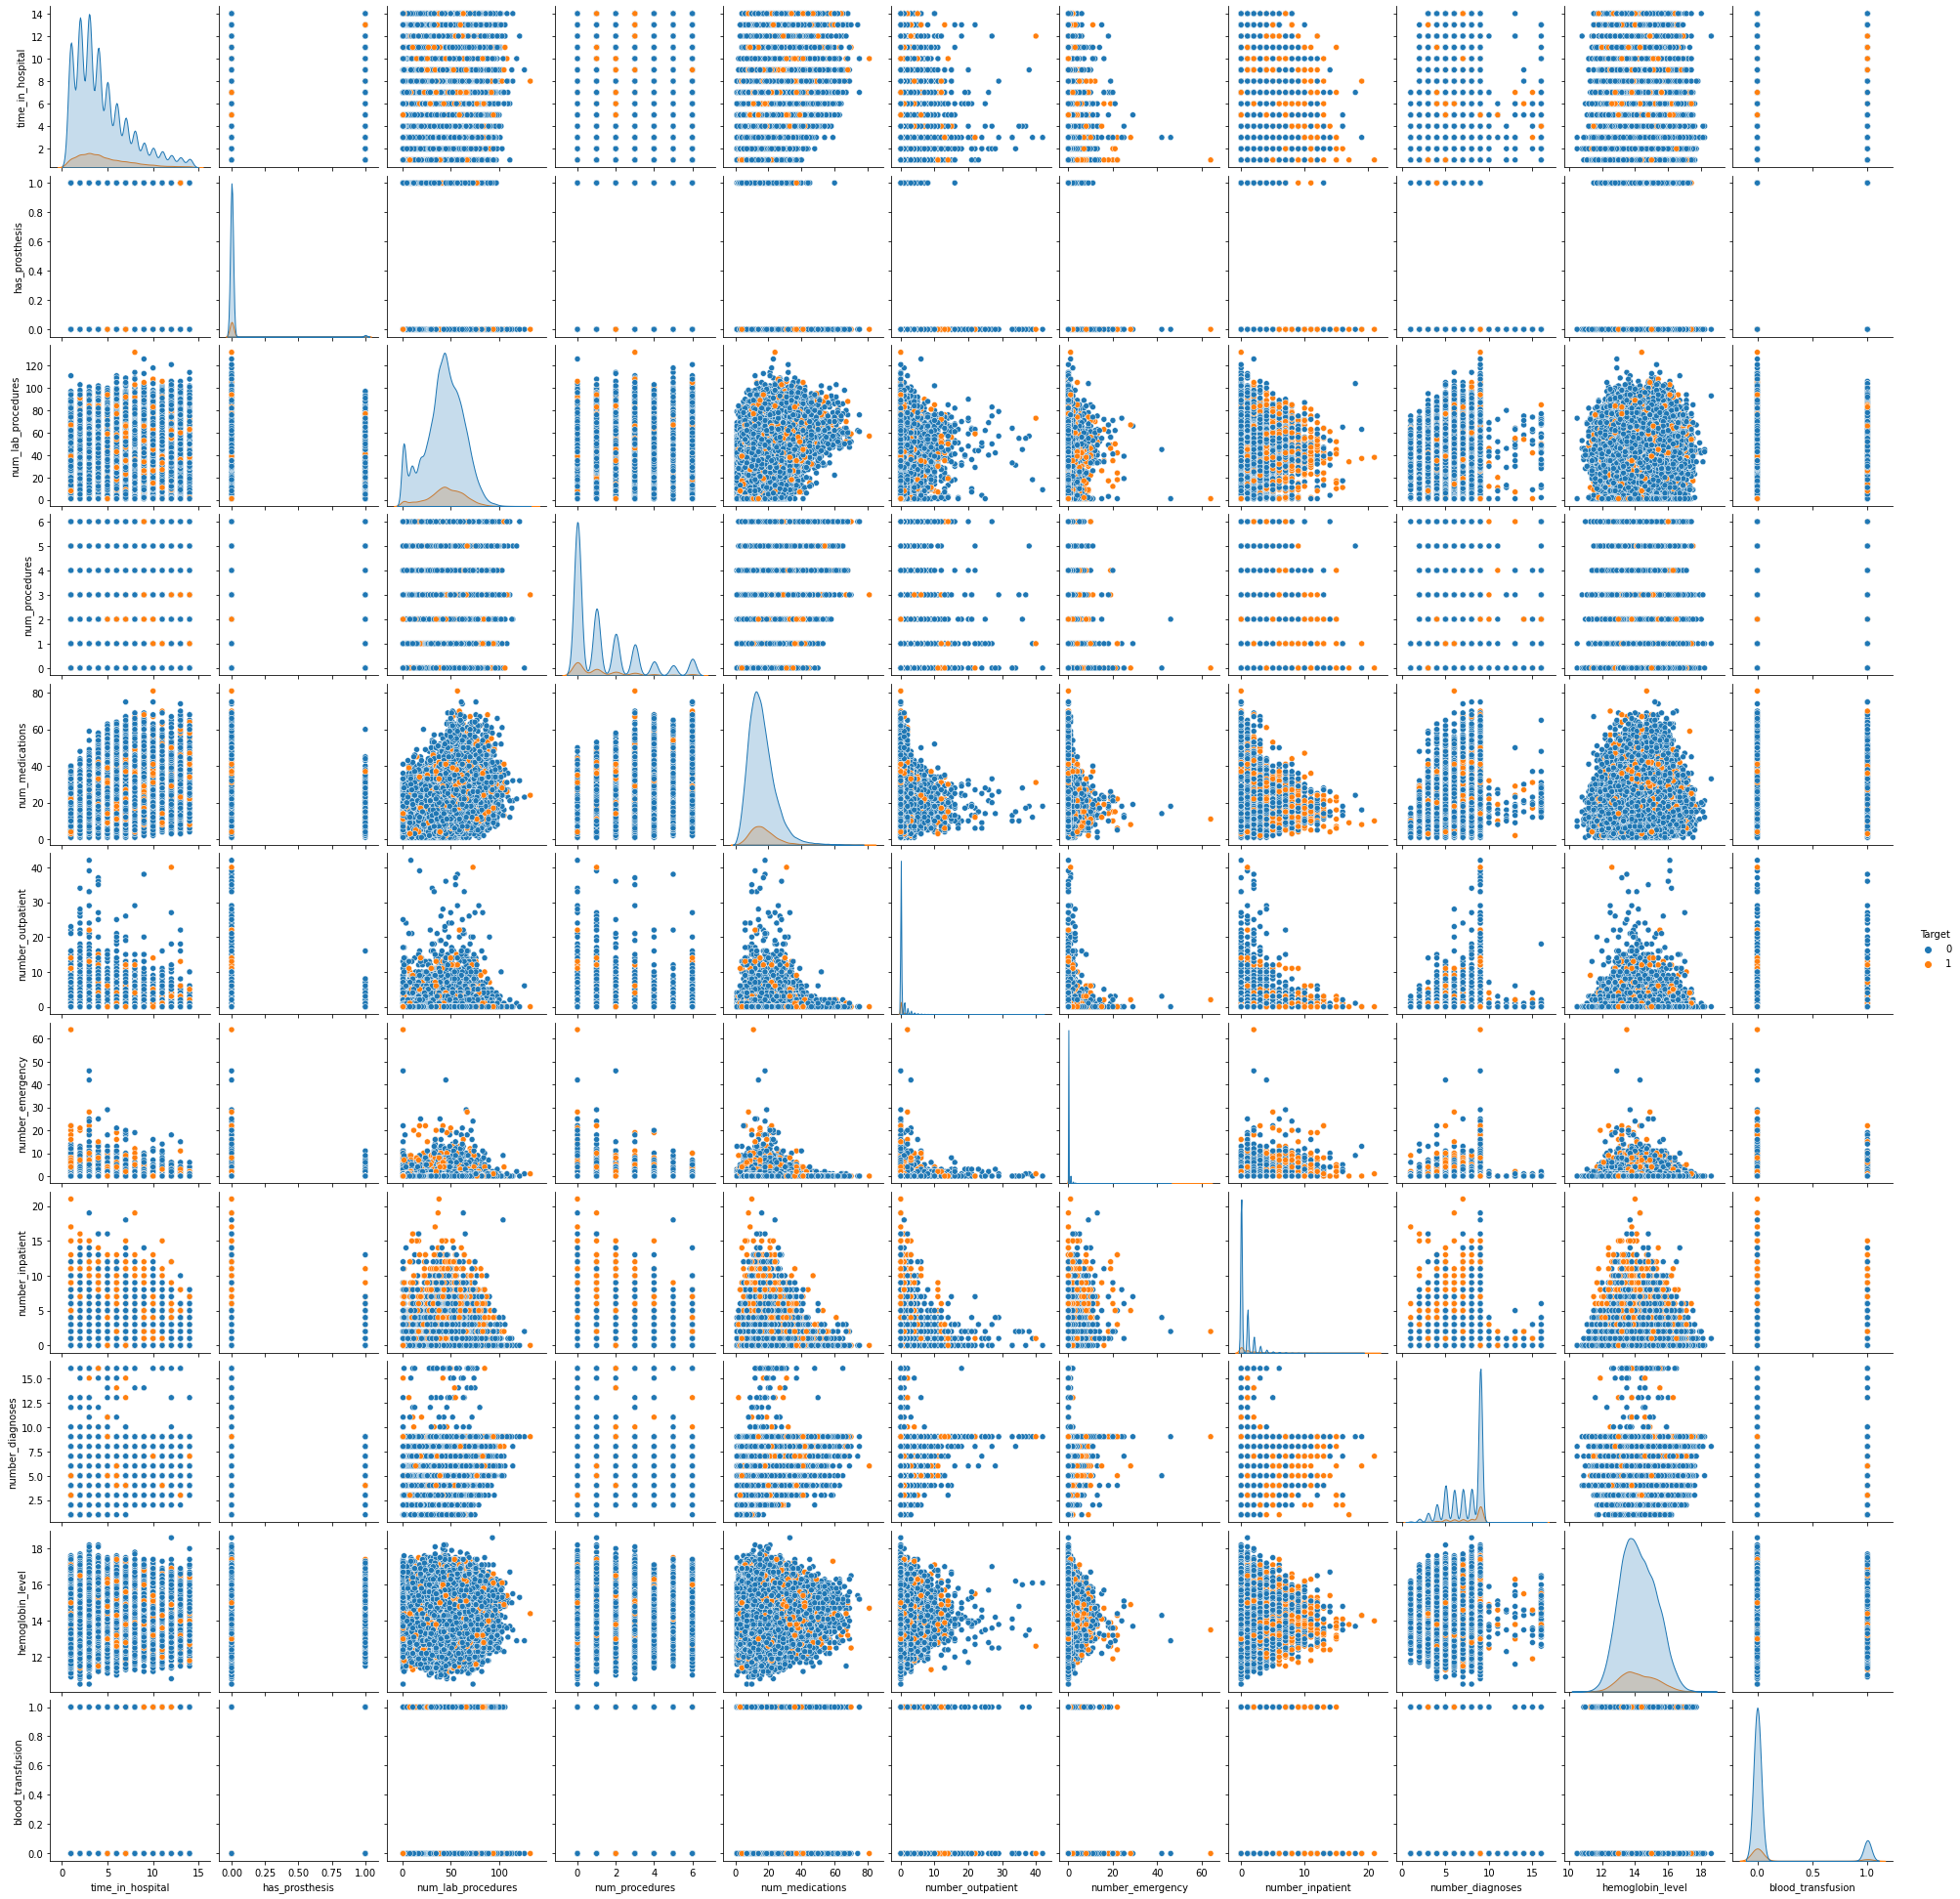

In [71]:
# sns.pairplot(df.drop(columns = cols_to_drop), hue = 'Target')

# plt.show()